In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import datetime

In [2]:
import re

float_expr = re.compile(r"-?\d*\.?\d+")
 
def gen_file_data(f):
    for line in f:
        line_data = float_expr.findall(line)
        yield (float(v) for v in line_data)
        
# HEXENWERK DIGGA

In [4]:
df = pd.DataFrame.from_records(gen_file_data(open('geolore/DATA_repaied.TXT', 'r')))

df.drop(df.index[-1], inplace= True)
df.drop([0], axis=1, inplace=True)

In [ ]:
df.to_pickle('Output/df.pkl')

In [58]:
date_time = pd.date_range(start = datetime.datetime(2022,8,10,13,35) , end = datetime.datetime(2022,8,10,13,35) + datetime.timedelta(seconds=1/8)*(len(df)-1), freq="0.125S")
df[1] = date_time
df.set_index(1, inplace=True)

In [119]:
df.to_pickle('Output/df_with_time.pkl')

(-0.01, 0.03)

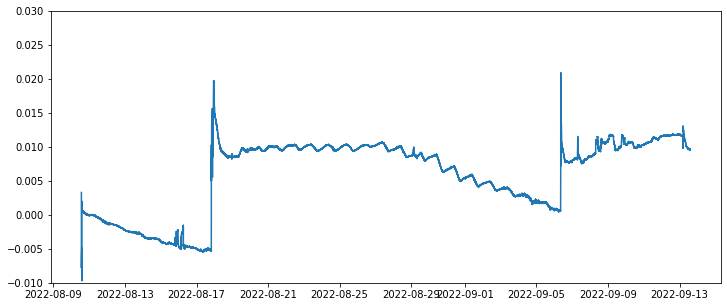

In [66]:
fig, ax = plt.subplots(1, figsize=(12,5))

ax.plot(df.iloc[:,0][::100])
ax.set_ylim(-0.01,0.03)

(-0.04, -0.02)

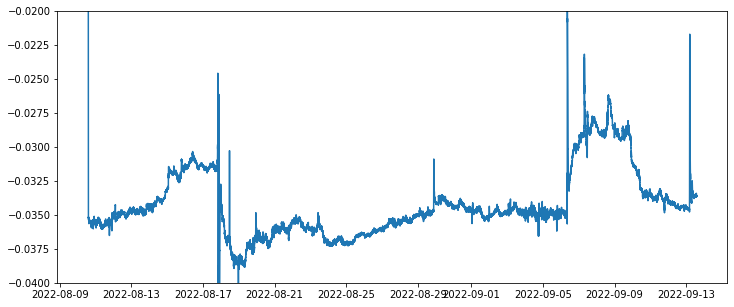

In [67]:
fig, ax = plt.subplots(1, figsize=(12,5))

ax.plot(df.iloc[:,1][::100])
ax.set_ylim(-0.04,-0.02)

(0.0, 0.02)

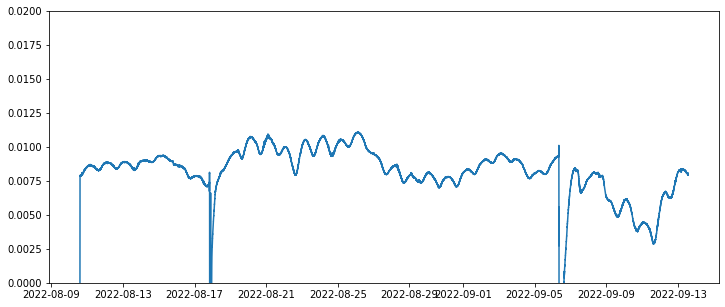

In [68]:
fig, ax = plt.subplots(1, figsize=(12,5))

ax.plot(df.iloc[:,2][::100])
ax.set_ylim(0, 0.02)
#ax.set_xlim(datetime.datetime())

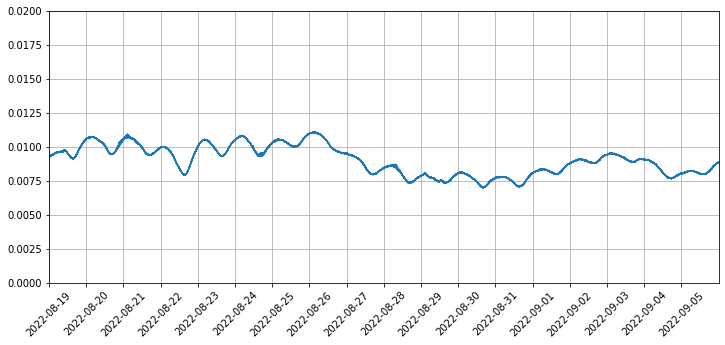

In [79]:
fig, ax = plt.subplots(1, figsize=(12,5))

ax.plot(df.iloc[:,2][::100])
ax.set_ylim(0, 0.02)
ax.set_xlim(datetime.datetime(2022,8,19), datetime.datetime(2022,9,6))
ax.set_xticks(np.arange(np.datetime64('2022-08-19'), np.datetime64('2022-09-06')))
ax.tick_params('x',labelrotation=45)
ax.grid()

In [84]:
data = pd.read_csv('dt80/dex-chart-undefined-2022-09-13T11-04-50_data.csv', 
                   parse_dates=[0])
data.rename(columns={'Red_Filter (mV)':'center_E2_filtered',
                     'Blue_Filter (mV)':'north_E4_filtered',
                     'Green_Filter (mV)':'west_E11_filtered',
                     'Red_Raw (mV)':'center_E2_raw',
                     'Blue_Raw (mV)':'north_E4_raw',
                     'Green_Raw (mV)':'west_E11_raw',
                     'Temperatur_mV (degC)':'temp',
                     'ext_voltage (V)':'ext_v'}, inplace=True)

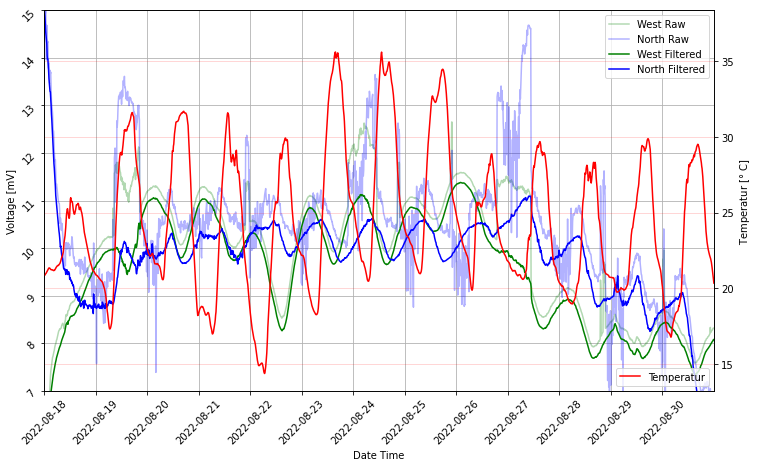

In [85]:
fig, ax = plt.subplots(1, figsize=(12,7))


#ax.plot(data['Timestamp'], data['Red_Raw (mV)'], color="Red", alpha=0.3)
ax.plot(data['Timestamp'], data['west_E11_raw'] , color="green", alpha=0.3, label="West Raw")
ax.plot(data['Timestamp'], data['north_E4_raw'], color="blue", alpha=0.3, label="North Raw")

#ax.plot(data['Timestamp'], data['Red_Filter (mV)'], color="Red")
ax.plot(data['Timestamp'], data['west_E11_filtered'] , color="green", label="West Filtered")
ax.plot(data['Timestamp'], data['north_E4_filtered'], color="blue", label="North Filtered")

ax1 = ax.twinx()

ax1.plot(data['Timestamp'], data['temp'], color='red', label='Temperatur')
ax1.set_ylabel(r'Temperatur [$\degree$ C]')
ax1.grid(color='red', alpha=0.2)
ax1.legend(loc='lower right')


ax.set_xlim(datetime.datetime(2022,8,18), datetime.datetime(2022,8,31))
ax.set_xticks(np.arange(np.datetime64('2022-08-18'), np.datetime64('2022-08-31')))
ax.tick_params(labelrotation=45)
ax.set_ylim(7,15)
ax.grid()
ax.set_ylabel("Voltage [mV]")
ax.set_xlabel("Date Time")
ax.legend()

#fig.savefig("Output/Overview_zoomed.pdf")

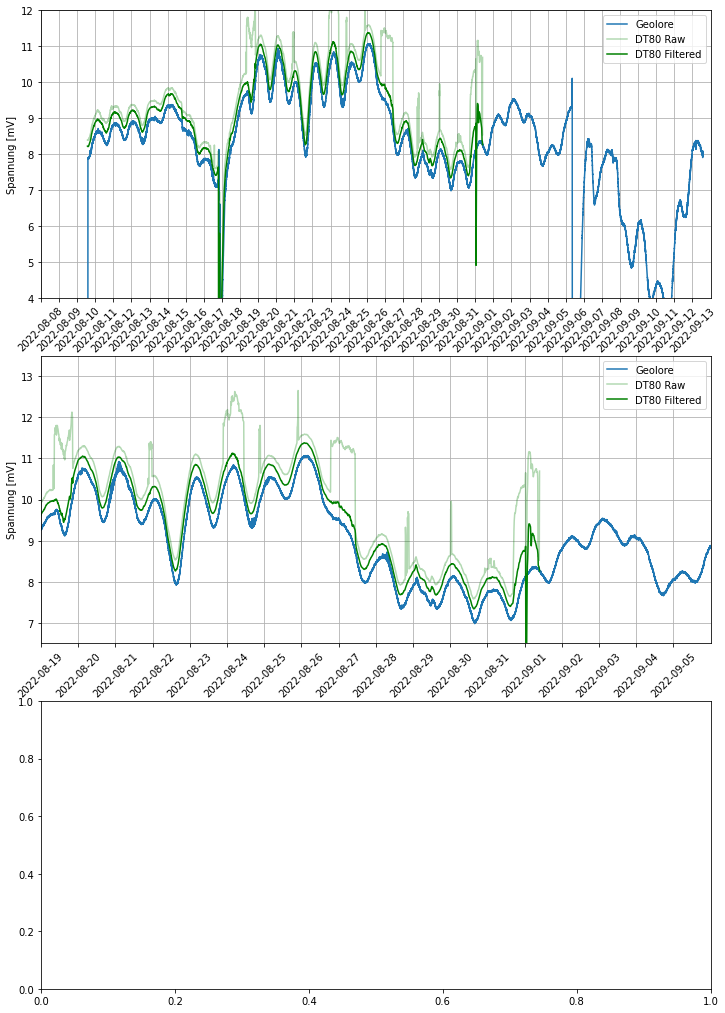

In [138]:
fig, axes = plt.subplots(3, figsize=(12,18))

ax = axes[0]
ax.plot(df.iloc[:,2][::100]*1000, label="Geolore")

ax.plot(data['Timestamp'], data['west_E11_raw'] , color="green", alpha=0.3, label="DT80 Raw")
ax.plot(data['Timestamp'], data['west_E11_filtered'] , color="green", label="DT80 Filtered")

ax.set_ylim(4,12)
ax.set_xlim(datetime.datetime(2022,8,8), datetime.datetime(2022,9,14))
ax.set_xticks(np.arange(np.datetime64('2022-08-08'), np.datetime64('2022-09-14')))
ax.tick_params('x',labelrotation=45)
ax.set_ylabel('Spannung [mV]')
ax.grid()
ax.legend()

ax = axes[1]
ax.plot(df.iloc[:,2][::100]*1000, label="Geolore")

ax.plot(data['Timestamp'], data['west_E11_raw'] , color="green", alpha=0.3, label="DT80 Raw")
ax.plot(data['Timestamp'], data['west_E11_filtered'] , color="green", label="DT80 Filtered")

ax.set_ylim(6.5,13.5)
ax.set_xlim(datetime.datetime(2022,8,19), datetime.datetime(2022,9,6))
ax.set_xticks(np.arange(np.datetime64('2022-08-19'), np.datetime64('2022-09-06')))
ax.tick_params('x',labelrotation=45)
ax.set_ylabel('Spannung [mV]')
ax.grid()
ax.legend()

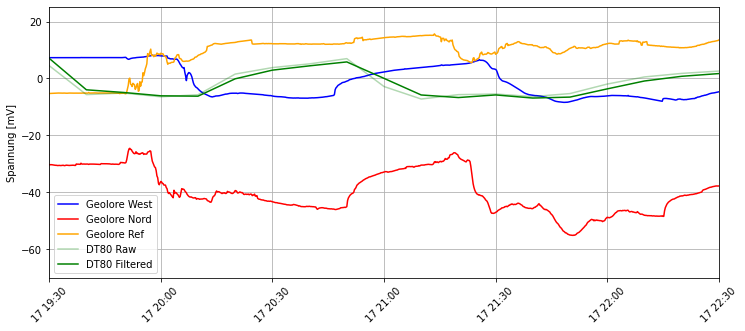

In [136]:
fig, axes = plt.subplots(1, figsize=(12,5))

ax = axes
ax.plot(df.iloc[:,2][::100]*1000, color="blue", label="Geolore West")
ax.plot(df.iloc[:,1][::100]*1000, color="red", label="Geolore Nord")
ax.plot(df.iloc[:,0][::100]*1000, color="orange", label="Geolore Ref")

ax.plot(data['Timestamp'], data['west_E11_raw'] , color="green", alpha=0.3, label="DT80 Raw")
ax.plot(data['Timestamp'], data['west_E11_filtered'] , color="green", label="DT80 Filtered")

#ax.set_ylim(-10,13.5)
#ax.set_xlim(datetime.datetime(2022,8,17,19,30), datetime.datetime(2022,8,17,22,30 ))
ax.set_xlim(datetime.datetime(2022,8,17,19,30), datetime.datetime(2022,8,17,22,30 ))
#ax.set_xticks(np.arange(np.datetime64('2022-08-17'), np.datetime64('2022-08-19')))
ax.tick_params('x',labelrotation=45)
ax.set_ylabel('Spannung [mV]')
ax.grid()
ax.legend()

/opt/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


Text(0.5, 1.0, 'FFT between 2022-08-18 & 2022-09-02 from Geolore')

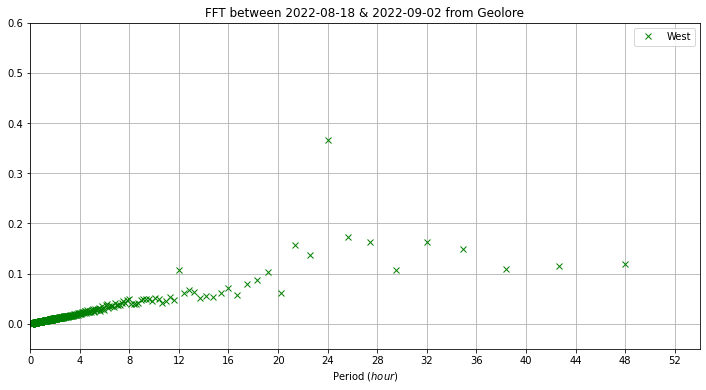

In [179]:
X_1 = df.iloc[:,2][::500][datetime.datetime(2022,8,18):datetime.datetime(2022,9,3)]*1000


FFT = np.fft.fft(X_1.values)
N = len(X_1)
n = np.arange(N)
# get the sampling rate
sr = 1/(X_1.index[1]-X_1.index[0]).total_seconds()
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

t_h = 1/f_oneside / (60 * 60)

fig , ax =plt.subplots(1, figsize = (12, 6))
#ax = axes[0]
ax.plot(t_h, np.abs(FFT[:n_oneside])/n_oneside, "x", color='green', label='West')

ax.set_ylim(-0.05,0.6)
ax.set_xlim(0, 54)
ax.set_xticks(np.arange(0,54,4))
ax.set_xlabel('Period ($hour$)')
ax.grid()
ax.legend()
ax.set_title("FFT"+" between {:} & {:} from Geolore".format(X_1.index[0].date() , X_1.index[-1].date()))
#fig.savefig("Output/SP_2019_FFT_after_detrend.pdf")

62.5